# Carregando libs


In [155]:
from google.colab import drive
drive.mount('/content/drive')
from google.colab.patches import cv2_imshow

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [156]:
import cv2
import matplotlib.pyplot as plt 

# Operando com histograma

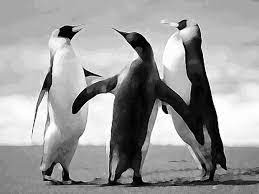

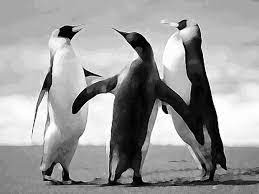

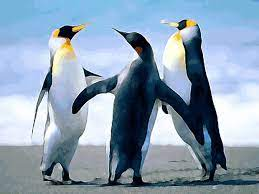

(194, 259)


In [157]:
#@title Carregando imagem

img=cv2.imread('/content/drive/MyDrive/Colab Notebooks/PDI/img/pinguins.jpeg')
img_g=cv2.imread('/content/drive/MyDrive/Colab Notebooks/PDI/img/pinguins.jpeg', cv2.IMREAD_GRAYSCALE)
img_gc=img_g.copy() #copia da imagem em tom de cinza
cv2_imshow(img_gc)
cv2_imshow(img_g)
cv2_imshow(img)
print(img_g.shape)

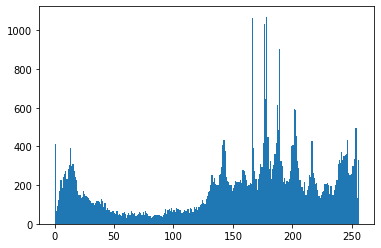

1070.0


In [158]:
#@title Criando histograma da imagem cinza
hist=plt.hist(img_gc.ravel(),256,[0,256],)
plt.show() 
print(max(hist[0]))

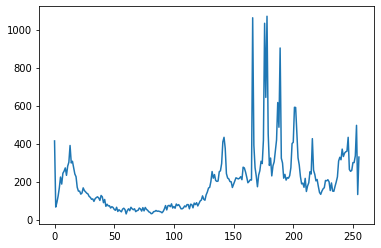

In [159]:
histg = cv2.calcHist([img_gc],[0],None,[256],[0,256])
plt.plot(histg)
plt.show()

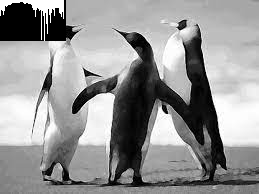

In [160]:
#@title Imagem com histograma

inicio=(0,0)
fim=(65,40)
cv2.rectangle(img_gc,inicio,fim,(0,0,0),-1)
for i in range(len(histg)):
  cv2.line(img_gc, (int(i/4),0),(int(i/4),int(histg[i]/26.75)),(255,255,255),)
cv2_imshow(img_gc)

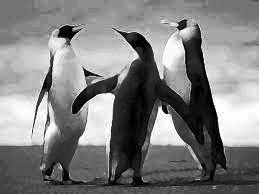

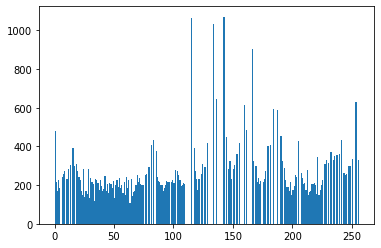

In [161]:
#@title Imagem equalizada
equali=cv2.equalizeHist(img_g)
cv2_imshow(equali)
hist=plt.hist(equali.ravel(),256,[0,256],)
plt.show() 

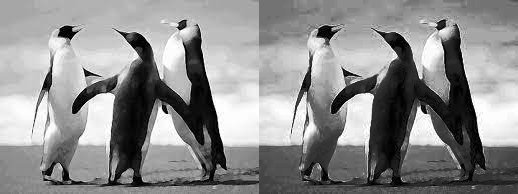

In [162]:
import numpy as np
res = np.hstack((img_g,equali)) #coloca imagens lado a lado
cv2_imshow(res)

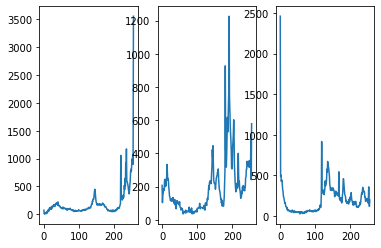

In [163]:
#@title Histograma da imagem para BRG

#criando os hsitogramas dos canais
histog_b=cv2.calcHist([img],[0],None,[256],[0,256])
histog_g=cv2.calcHist([img],[1],None,[256],[0,256])
histog_r=cv2.calcHist([img],[2],None,[256],[0,256])

#plotando os canais
plt.subplot(1,3,1)
plt.plot(histog_b)
plt.subplot(1,3,2)
plt.plot(histog_g)
plt.subplot(1,3,3)
plt.plot(histog_r)
plt.show()

# Comparando histogramas


In [164]:
cv2.imwrite('ultimo_hist.png',histg) #histograma da imagem em tons de cinza
nova_img=str(input('Digite o caminho para a imagem que deseja usar o novo histograma: '))
imgHN=cv2.imread(nova_img, cv2.COLOR_BAYER_GR2GRAY)

Digite o caminho para a imagem que deseja usar o novo histograma: /content/drive/MyDrive/Colab Notebooks/PDI/img/portadora.jpg


<function matplotlib.pyplot.show(*args, **kw)>

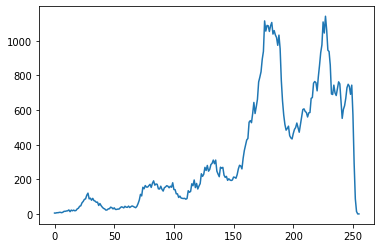

In [165]:
histo_novo=cv2.calcHist([imgHN],[0], None, [256], [0,256])
plt.plot(histo_novo)
plt.show

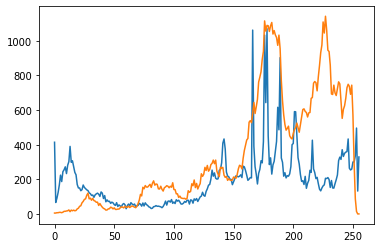

In [166]:
histos_lado = np.hstack((histg,histo_novo)) #coloca imagens lado a lado
plt.plot(histos_lado)
plt.show()

In [167]:
compara=cv2.compareHist(histg,histo_novo,cv2.HISTCMP_BHATTACHARYYA)
compara

0.2971145926270758

In [168]:
limiar=0.3
if compara>limiar:
  print('Atenção, limiar foi ultrapassado!')